In [36]:
import json
from keras.models import model_from_json

with open('model.json') as json_file:
  model_json = json_file.read()

model = model_from_json(model_json)

In [37]:
model.load_weights('model_weights.h5')

In [38]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
from keras.preprocessing.image import ImageDataGenerator

size = (256, 256)

test_datagen = ImageDataGenerator(rescale=1./255)
test = test_datagen.flow_from_directory('/content/test_imgs/test/',
                                  target_size=size,
                                  batch_size=1,
                                  class_mode='binary')

Found 2 images belonging to 2 classes.


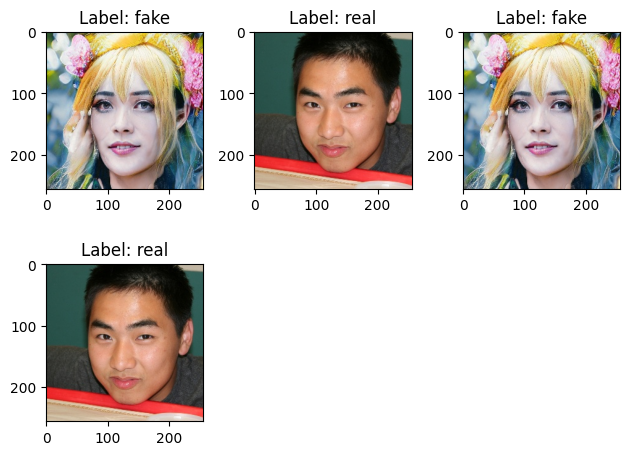

In [58]:
import matplotlib.pyplot as plt

classes = ['fake', 'real']

for i in range(2):
    batch = test.next()
    image = batch[0][0]
    label = batch[1][0]

    plt.subplot(2, 3, i+1)
    plt.imshow(image)
    plt.title(f'Label: {classes[int(label)]}')

plt.tight_layout()
plt.show()

In [59]:
import numpy as np
from keras.preprocessing import image

pred = model.predict(test)

2/2 [==============================] - 1s 231ms/step


In [60]:
pred.round()

array([[0.],
       [1.]], dtype=float32)

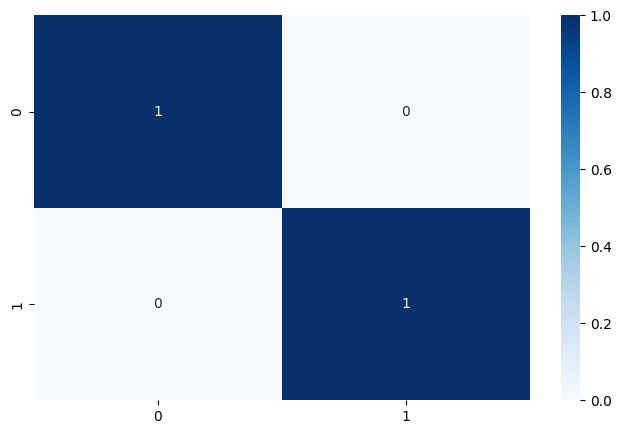

In [61]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,5))
sns.heatmap(metrics.confusion_matrix(test.classes, pred.round()), annot = True,fmt="d",cmap = "Blues")
plt.show()

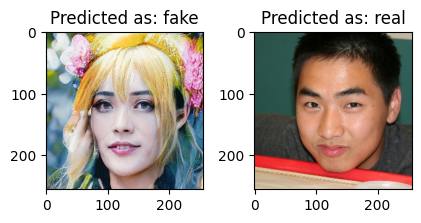

In [62]:
import matplotlib.pyplot as plt

classes = ['fake', 'real']

for i in range(2):
    batch = test.next()
    image = batch[0][0]
    y = (pred[i][0]).round()
    plt.subplot(2, 3, i+1)
    plt.imshow(image)
    plt.title(f'Predicted as: {classes[int(y)]}')

plt.tight_layout()
plt.show()